**Assignment 1 **
--
**KNN**
--

Mounting with drive

In [7]:
# connection with google drive
#from google.colab import drive
#drive.mount('/content/drive')

#**Library**

In [8]:
# Import necessary libraries
import os
import cv2
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import Counter

#Setting Dataset Path

In [9]:
# Setting the dataset path for accessing image files in the specified directory.
dataset_path = '/content/drive/MyDrive/animals'

In [10]:
os.listdir(dataset_path)


['animals', 'panda', 'images', 'cats', 'dogs']

# Listing dataset categories and displaying their paths

In [19]:
categories = os.listdir(dataset_path)
print("Categories Found:", categories)


for idx, category in enumerate(categories):
    folder_path = os.path.join(dataset_path, category)
    print(f"Category {idx}: {category} | Path: {folder_path}")

Categories Found: ['animals', 'panda', 'images', 'cats', 'dogs']
Category 0: animals | Path: /content/drive/MyDrive/animals/animals
Category 1: panda | Path: /content/drive/MyDrive/animals/panda
Category 2: images | Path: /content/drive/MyDrive/animals/images
Category 3: cats | Path: /content/drive/MyDrive/animals/cats
Category 4: dogs | Path: /content/drive/MyDrive/animals/dogs


 # Manhattan and Euclidean Distance  Function

In [12]:
# Manhattan Distance Function
def manhattan_distance(point1, point2):
    return np.sum(np.abs(np.array(point1) - np.array(point2)))

# Euclidean Distance Function
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))

def knn_predict(distances, k=3):
    neighbors = sorted(distances, key=lambda x: x[0])[:k]
    labels = [label for _, label in neighbors]
    return Counter(labels).most_common(1)[0][0]

# CROSS VALIDATION

In [13]:
def KNN(distance_func, k_range=range(1, 16)):
    all_accuracies = []

    for k in k_range:
        accuracies = []
        for i in range(5):
            val_set = folds[i]
            train_set = [item for j, fold in enumerate(folds) if j != i for item in fold]

            correct = 0
            for val_img, true_label in tqdm(val_set, desc=f"Fold {i+1}, K={k}", leave=False):
                distances = [(distance_func(val_img, train_img), label) for train_img, label in train_set]
                pred = knn_predict(distances, k)
                correct += (pred == true_label)

            acc = correct / len(val_set)
            accuracies.append(acc)

        avg_acc = np.mean(accuracies)
        all_accuracies.append(avg_acc)
        print(f"K={k}, Avg Accuracy = {avg_acc:.4f}")

    return all_accuracies

# PREPROCESSING IMAGES

In [14]:
categories = ['cats', 'dogs', 'panda']
train_data = []
img_size = 32
images_per_class = 1000

for label, category in enumerate(categories):
    path = os.path.join(dataset_path, category)
    count = 0
    for img_name in tqdm(os.listdir(path), desc=f"Loading {category}"):
        if count >= images_per_class:
            break
        try:
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            resized = cv2.resize(gray, (img_size, img_size))
            train_data.append([resized, label])
            count += 1
        except:
            continue

np.random.shuffle(train_data)

Loading panda: 100%|██████████| 1000/1000 [00:37<00:00, 26.95it/s]


#Display Images

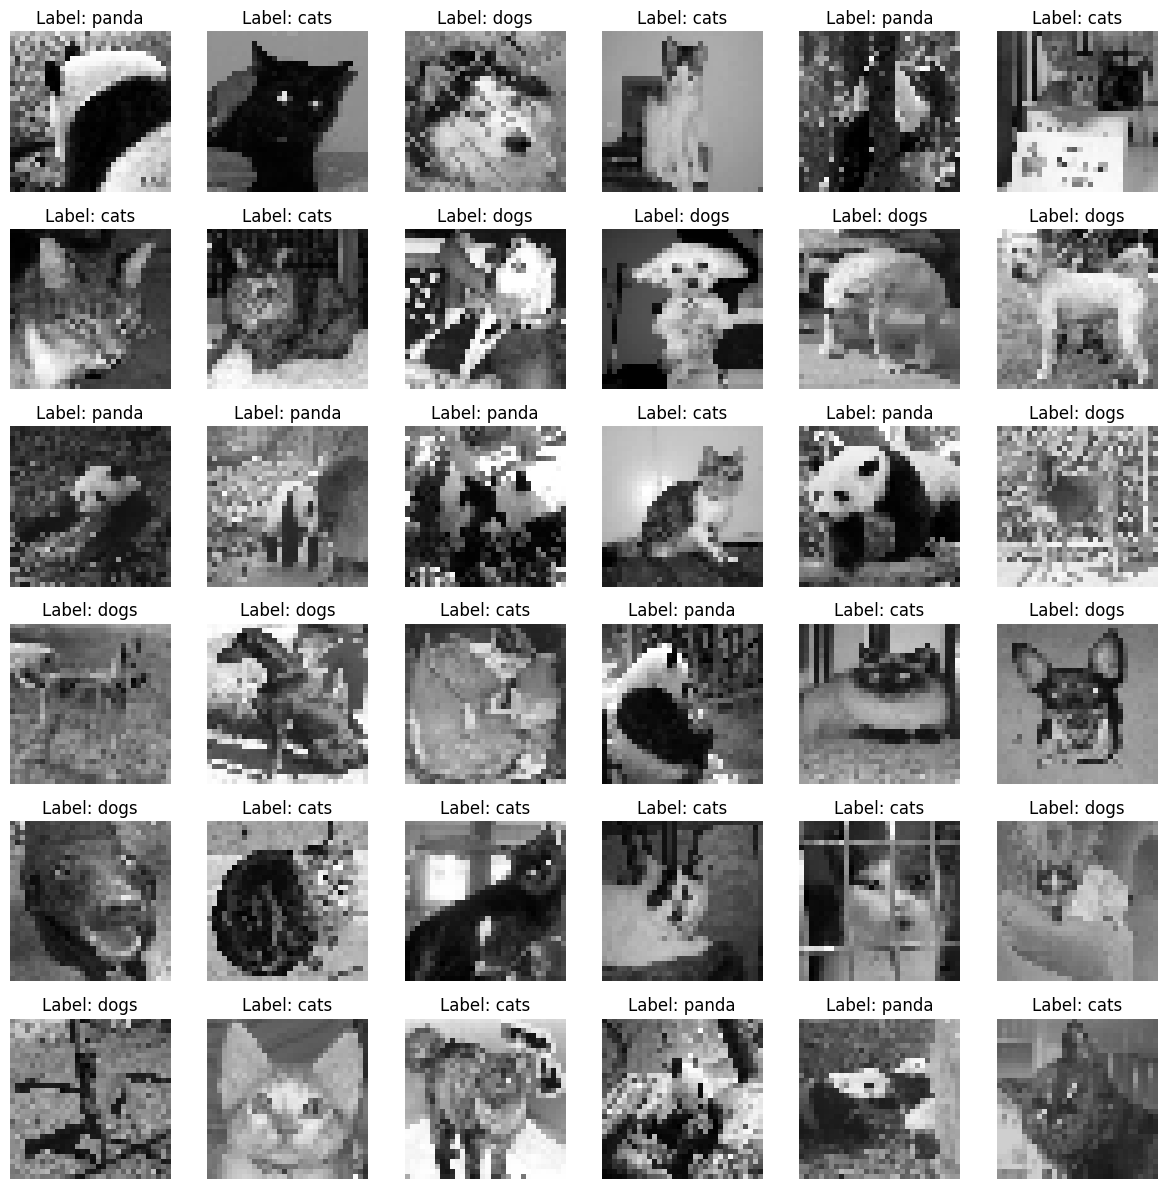

In [16]:
# Number of images to display
num_images_to_display = 36

# Create a plot with subplots
fig, axes = plt.subplots(6, 6, figsize=(12, 12))

axes = axes.flatten()

# Plot the images
for i in range(num_images_to_display):
    image, label = train_data[i]

    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

    # Display the image
    axes[i].imshow(image)
    axes[i].set_title(f"Label: {categories[label]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Splits the training data into 5 folds for 5-fold cross-validation.

In [17]:
# Splits the training data into 5 folds for 5-fold cross-validation.

fold_size = len(train_data) // 5
folds = []

start_idx = 0
for i in range(5):
    end_idx = start_idx + fold_size
    folds.append(train_data[start_idx:end_idx])
    start_idx = end_idx


for i, fold in enumerate(folds):
      print(f"Fold {i + 1} : total images- {len(fold)} ")

Fold 1 : total images- 600 
Fold 2 : total images- 600 
Fold 3 : total images- 600 
Fold 4 : total images- 600 
Fold 5 : total images- 600 


In [18]:
k_range = range(1, 31)
print("\nEvaluating Manhattan (L1) Distance:")
acc_l1 = KNN(manhattan_distance, k_range)

print("\nEvaluating Euclidean (L2) Distance:")
acc_l2 = KNN(euclidean_distance, k_range)


Evaluating Manhattan (L1) Distance:


K=1, Avg Accuracy = 0.3873


K=2, Avg Accuracy = 0.3873


K=3, Avg Accuracy = 0.3907


K=4, Avg Accuracy = 0.3930


K=5, Avg Accuracy = 0.4017


K=6, Avg Accuracy = 0.4070


K=7, Avg Accuracy = 0.4043


K=8, Avg Accuracy = 0.4080


K=9, Avg Accuracy = 0.4100


K=10, Avg Accuracy = 0.4200


K=11, Avg Accuracy = 0.4193


K=12, Avg Accuracy = 0.4290


K=13, Avg Accuracy = 0.4247


K=14, Avg Accuracy = 0.4237


K=15, Avg Accuracy = 0.4223


K=16, Avg Accuracy = 0.4233


K=17, Avg Accuracy = 0.4280


K=18, Avg Accuracy = 0.4217


K=19, Avg Accuracy = 0.4253


K=20, Avg Accuracy = 0.4197


K=21, Avg Accuracy = 0.4193


K=22, Avg Accuracy = 0.4217


K=23, Avg Accuracy = 0.4223


K=24, Avg Accuracy = 0.4280


K=25, Avg Accuracy = 0.4293


K=26, Avg Accuracy = 0.4300


K=27, Avg Accuracy = 0.4237


K=28, Avg Accuracy = 0.4240


K=29, Avg Accuracy = 0.4227


K=30, Avg Accuracy = 0.4333

Evaluating Euclidean (L2) Distance:


K=1, Avg Accuracy = 0.4343


K=2, Avg Accuracy = 0.4343


K=3, Avg Accuracy = 0.4430


K=4, Avg Accuracy = 0.4580


K=5, Avg Accuracy = 0.4603


K=6, Avg Accuracy = 0.4593


K=7, Avg Accuracy = 0.4670


K=8, Avg Accuracy = 0.4713


K=9, Avg Accuracy = 0.4867


K=10, Avg Accuracy = 0.4870


K=11, Avg Accuracy = 0.4857


K=12, Avg Accuracy = 0.4893


K=13, Avg Accuracy = 0.4940


K=14, Avg Accuracy = 0.4990


K=15, Avg Accuracy = 0.5017


K=16, Avg Accuracy = 0.5080


K=17, Avg Accuracy = 0.5073


K=18, Avg Accuracy = 0.5050


K=19, Avg Accuracy = 0.5027


K=20, Avg Accuracy = 0.5093


K=21, Avg Accuracy = 0.5077


K=22, Avg Accuracy = 0.5063


K=23, Avg Accuracy = 0.5073


K=24, Avg Accuracy = 0.5103


K=25, Avg Accuracy = 0.5100


K=26, Avg Accuracy = 0.5097


K=27, Avg Accuracy = 0.5133


K=28, Avg Accuracy = 0.5200


K=29, Avg Accuracy = 0.5203


K=30, Avg Accuracy = 0.5173


# **Plotting And Accuracy**

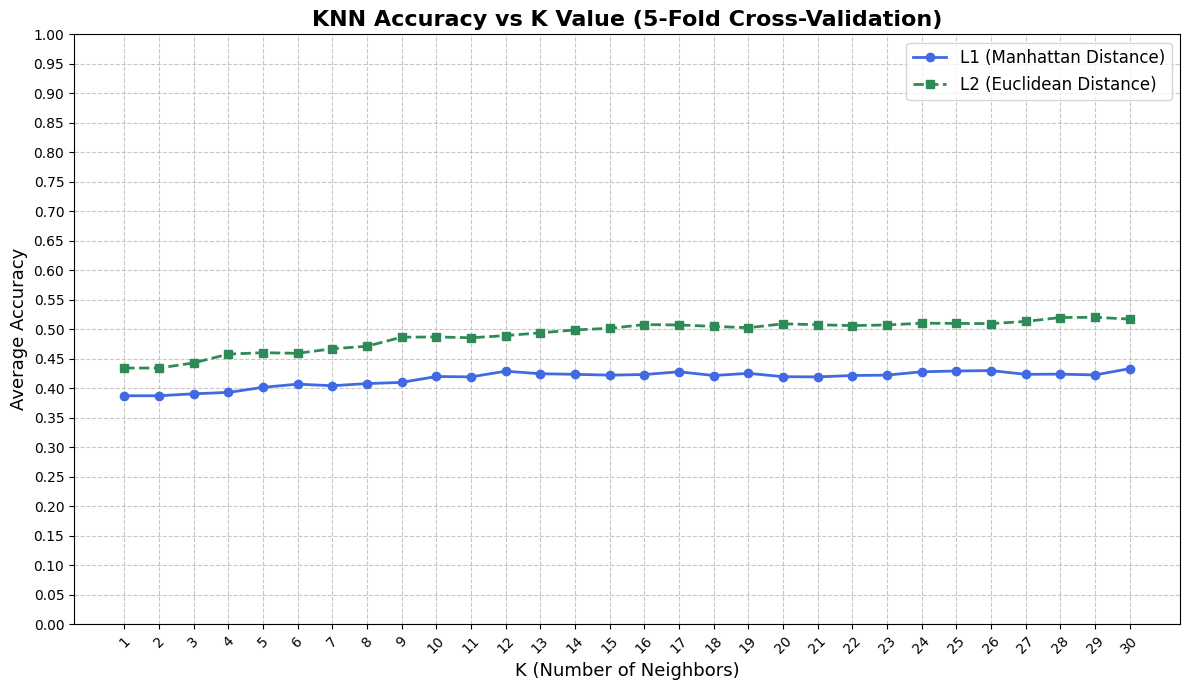

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

# Plot L1 and L2 accuracy curves
plt.plot(k_range, acc_l1, marker='o', linestyle='-', linewidth=2, markersize=6,
         label='L1 (Manhattan Distance)', color='royalblue')
plt.plot(k_range, acc_l2, marker='s', linestyle='--', linewidth=2, markersize=6,
         label='L2 (Euclidean Distance)', color='seagreen')

# Title and labels
plt.title("KNN Accuracy vs K Value (5-Fold Cross-Validation)", fontsize=16, fontweight='bold')
plt.xlabel("K (Number of Neighbors)", fontsize=13)
plt.ylabel("Average Accuracy", fontsize=13)

# Grid, legend, and ticks
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.xticks(k_range, rotation=45)
plt.yticks(np.arange(0, 1.05, 0.05))  # Better scale

# Show the plot
plt.tight_layout()
plt.show()


# Top 5 Predictions with Fold 0 :

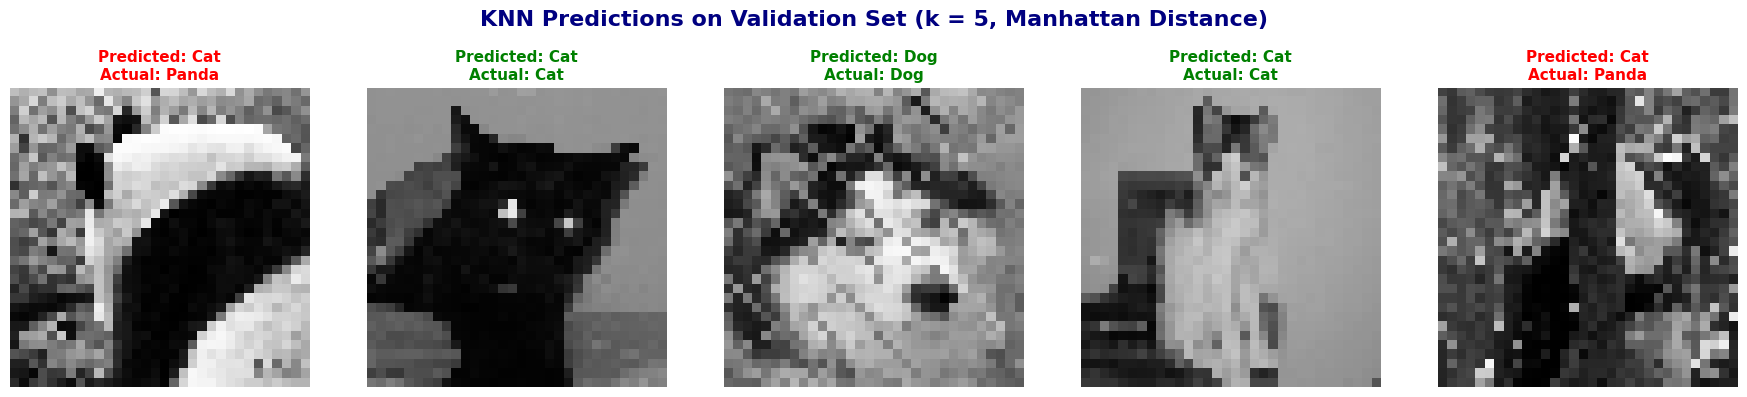

In [32]:
# Configuration
val_set = folds[0][:5]  # First 5 samples from validation set
train_set = [item for j, fold in enumerate(folds) if j != 0 for item in fold]
final_k = 5
final_distance = euclidean_distance
label_names = ['Cat', 'Dog', 'Panda']

# Plotting predictions
plt.figure(figsize=(18, 4))

for i, (img, true_label) in enumerate(val_set):
    distances = [(final_distance(img, tr_img), label) for tr_img, label in train_set]
    pred = knn_predict(distances, final_k)

    img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    # Plotting
    ax = plt.subplot(1, 5, i + 1)
    ax.imshow(img_rgb)

    is_correct = pred == true_label
    ax.set_title(
        f"Predicted: {label_names[pred]}\nActual: {label_names[true_label]}",
        fontsize=11,
        color='green' if is_correct else 'red',
        fontweight='bold'
    )
    ax.axis('off')

# Main title
plt.suptitle("KNN Predictions on Validation Set (k = 5, Manhattan Distance)",
             fontsize=16, fontweight='bold', color='navy')

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


📊 Discussion:
--
 Comparison of Manhattan (L1) vs Euclidean (L2) Distance in KNN Classification
 --
In this section, we analyze and compare the performance of Manhattan (L1) and Euclidean (L2) distance metrics in the context of K-Nearest Neighbors (KNN) classification. The comparison is based on the average accuracy values obtained from a 5-fold cross-validation process.

✅ Key Observations:
--
Manhattan (L1) Distance:
--
The average accuracy gradually improves with increasing values of K.

The highest performance is achieved at K = 30 with an average accuracy of 43.33%.

The improvement in accuracy is relatively slow and less consistent beyond K = 10.

Euclidean (L2) Distance:
--

Outperforms L1 distance across nearly all K values.

The accuracy increases more consistently and sharply from K = 1 to K = 30.

The peak performance is observed at K = 29, achieving 52.03% accuracy.

Even at lower values like K = 5, L2 achieves 46.03%, which is significantly higher than L1 at the same K.

🧠 Interpretation:
--
The Euclidean distance (L2) appears to be better suited for this specific grayscale image dataset. This is likely due to:

Grayscale intensity patterns being better captured in continuous Euclidean space.

L2 giving more weight to larger differences, which might help distinguish finer details in image features.

On the other hand, Manhattan distance (L1), which treats all dimensions equally, might not effectively capture the nuances in image data, especially where pixel differences are subtle but critical.
--
⚠️ Limitations:
--
The dataset appears to have modest classification performance overall, with the best accuracy around 52%, which suggests:

The feature representation (raw grayscale pixels) might not be rich enough.

More sophisticated feature extraction (e.g., HOG, PCA, CNN features) could significantly boost accuracy.

🔧 Potential Improvements:
--
Feature engineering: Use histogram of oriented gradients (HOG), SIFT, or deep learning-based embeddings for better feature quality.

Data augmentation: Introduce rotated, flipped, or contrast-adjusted versions of training images to improve model generalization.

Distance weighting: Use distance-weighted KNN where closer neighbors have more influence.

Hyperparameter tuning: Automate the search for the optimal K using techniques like grid search or cross-validation-based optimization.

📌 Conclusion:
--
Based on the current experiment, Euclidean (L2) distance provides consistently better classification results than Manhattan (L1) distance on this grayscale image dataset. Future work should focus on improving feature quality and exploring alternative KNN enhancements to further increase accuracy.